In [25]:
from IPython.display import display, Markdown, Latex
from math import sqrt, ceil

from product import Option
from strategy import *
from euronext import Page, Ticker
from graph import Graph

g=Graph(3.1, 4.8, 0.01, [3.8, 4.3])
# Le 3 décembre 2018
# si l'action été à 4.06€ les frais seraient remboursés
# l'écart-type à 252 période est de 0.3261
# var = deviation(close=4813, volatility=24, period=1, precision=0)
# g.sdeviation = var
# print('{}'.format(var))

In [5]:
# Le 3 décembre 2018
# si l'action été à 4.06€ les frais seraient remboursés
# l'écart-type à 252 période est de 0.3261
# expiration le 15 mars 2019 soit dans 71 jours
sd = 0.3261
close = 3.9
period = 71
sd_period = round(sqrt(period/252)*close*sd/100, 2)
vol = {
    '1': {'min': close - sd_period,
          'max': close + sd_period},
    '2': {'min': close - 2 * sd_period,
          'max': close + 2 * sd_period},
    'sd': sd_period,
    'ratio': sqrt(period/252),
} 
vol

{'1': {'min': 3.89, 'max': 3.9099999999999997},
 '2': {'min': 3.88, 'max': 3.92},
 'sd': 0.01,
 'ratio': 0.5307975430859037}

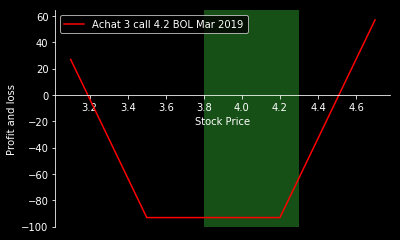

Category,strike,direction,Quantity,Cost,Premium
Call,4.2,long,3,45,0.15
Put,3.5,long,3,48,0.16


pv-max: 57.000000000000256 €
pv-min: -93.0 €


In [14]:
s = (Strategy('Achat 3 call 4.2 BOL Mar 2019')
     .add(Option(cat='Call', strike=4.2, achat=0.15, multiplier=100), 'long', 3)
     .add(Option(cat='Put', strike=3.5, achat=0.16, multiplier=100), 'long', 3)
     )
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))

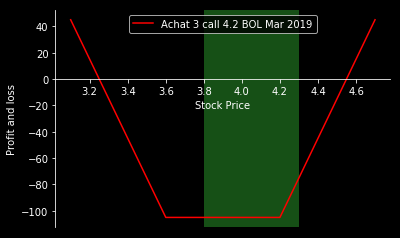

Category,strike,direction,Quantity,Cost,Premium
Call,4.2,long,3,45,0.15
Put,3.6,long,3,60,0.2


pv-max: 45.000000000000256 €
pv-min: -105.0 €


In [15]:
s = (Strategy('Achat 3 call 4.2 BOL Mar 2019')
     .add(Option(cat='Call', strike=4.2, achat=0.15, multiplier=100), 'long', 3)
     .add(Option(cat='Put', strike=3.6, achat=0.20, multiplier=100), 'long', 3)
     )
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))
print('pv-min: {} €'.format(min(s.payoff(g.sT, 'long'))))

In [29]:
def break_even(self, sT, sigma):e
    for strike, payoff in zip(sT, self.payoff(sT, 'long')):
        if -1 < payoff < 1:
            print('Strike {} -> {}'.format(round(strike, 2), payoff))
break_even(s, g.sT, 1)

Strike 3.25 -> 9.521272659185342e-13
Strike 4.55 -> -9.43600753089413e-12
